# Notebook for Prototyping Shuffling Connectivities

Within our TVB simulations, we want to determine how our results hold with differences in the structural connectivities. We can implement two different swapping experiments:

1. swapping between patients - exclude patient from list and choose another patient at random
2. randomly shuffling - use method in Proix paper that preseves nodal strength (more fair shuffling)

### To Do:
write code to shuffle connectivities given:
- (list of patients -> metadata, 
- number of simulations to run, etc.)

### Experiments
- **exp008**: write code to run with only one EZ out of the chosen ones in clinical hypothesis for each patient, simulate on all EZ/PZ (keep in one directory per patient, and just attach a index at end of filename) (exp008)
- **exp009**: shuffle weights (exp009) by just excluding the patient we want to get a shuffle of -> pick a random connectivity from someone else
- **exp010**: then randomly shuffling weights within a subject’s connectivity (exp010)

Here, let's produce the code for exp009 and exp010, so that it can be plugged into our simulation pipeline.

In [1]:
import numpy as np
import pandas as pd
import os

from tvb.simulator.lab import *
import sys
import scipy.io
import tvbsim

np.random.seed(123456789)

# plotting fxns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
%load_ext autoreload
%autoreload 2

   INFO  log level set to INFO


In [5]:
# set all directories
root_dir = os.path.join('/Users/adam2392/Documents/pydata/')

metadatadir = lambda patient: os.path.join(root_dir, "metadata", patient)

patients = ['id001_ac', 'id002_cj', 'id003_cm', 'id004_cv',
            'id005_et', 'id006_fb', 'id008_gc', 'id009_il',
           'id010_js', 'id011_ml', 'id012_pc', 'id013_pg', 'id014_rb']
# patient='id008_gc'
# patient ='id013_pg'
# patient = 'id001_ac'
# patient = 'id007_fo'
# patient = 'id009_il'
# patient = 'id010_js'
# patient = 'id012_pc'
# patient = 'id014_rb'
# patient = 'id015_sf'
expname = 'exp009'

# outputdatadir = os.path.join('/Users/adam2392/Documents/pydata/tvbforwardsim/', expname)
# if not os.path.exists(outputdatadir):
#     os.makedirs(outputdatadir)

def shuffleweights(connweights):
    
    pass

In [6]:
for patient in patients:
    ''' RANDOMLY SAMPLE FROM ANOTHER PATIENT '''
    patsamples = list(patients)
    patsamples.remove(patient)
    randpat = random.choice(patsamples)
    # initialize structural connectivity and main simulator object
#     con = connectivity.Connectivity.from_file(os.path.join(metadatadir(randpat), "connectivity.zip"))

    ''' RANDOMLY SUBSAMPLE WITHIN THIS CONNECTIVITY '''
    # initialize structural connectivity and main simulator object
    con = connectivity.Connectivity.from_file(os.path.join(metadatadir(patient), "connectivity.zip"))
    shuffledcon = shuffleweights(con)
    
    
    print(patient)
    print(randpat)
    break
print(patients)

WARNING  File 'hemispheres' not found in ZIP.
id001_ac
id013_pg
['id001_ac', 'id002_cj', 'id003_cm', 'id004_cv', 'id005_et', 'id006_fb', 'id008_gc', 'id009_il', 'id010_js', 'id011_ml', 'id012_pc', 'id013_pg', 'id014_rb']


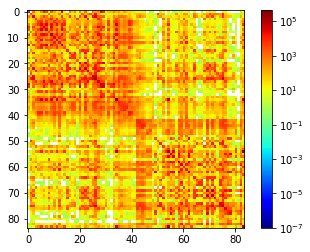

In [7]:
from matplotlib import colors, cm
plt.figure()
image = con.weights
norm = colors.LogNorm(1e-7, image.max()) #, clip='True')
plt.imshow(image, norm=norm, cmap=cm.jet)
plt.colorbar()
#max(con.weights[con.weights != 0])

(84, 84)


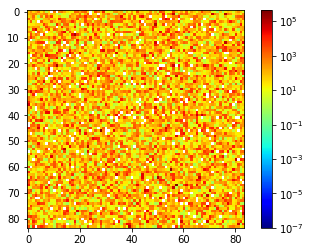

In [15]:
print(con.weights.shape)
test = np.random.choice(con.weights.ravel(), size=con.weights.shape, replace=False)
plt.figure()
image = test
norm = colors.LogNorm(1e-7, image.max()) #, clip='True')
plt.imshow(image, norm=norm, cmap=cm.jet)
plt.colorbar()
#max(con.weights[con.weights != 0])